<a href="https://colab.research.google.com/github/GonRosas97/RNDL/blob/main/Articulo_Cientifico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Para el desarrollo de esta práctica tomaremos como referencia el paper ***Road Extraction by Deep Residual U-Net*** https://arxiv.org/pdf/1711.10684.pdf

Utilizaremos el siguiente repositorio: https://github.com/edwinpalegre/EE8204-ResUNet y haremos uso de los siguientes archivos públicos:


*   **model_resunet.py** que es donde encontramos el archivo principal con las funciones que implementan la arquitectura detalla en el paper nates mencionado.
*   **Best ResUNet.h5** contiene los pesos del modelo pre-entrenado.
* **dataset_downloader.py** archivo encargado de cargar el dataset para ResUnet.



In [ ]:
# Realizamos conexión con google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Librerías básicas

In [ ]:
from tensorflow.keras import Model
from tensorflow.keras import layers

# 1. Model summary, con las capas y no. de hyperparámetros.

Lo siguientes bloques de código corresponden a funciones para implementar la arquitectura descrita en el paper.

In [ ]:
# Importamos archivos del github mencionado anteriormente
import sys
sys.path.append('/content/drive/MyDrive')
from model_resunet import ResUNet
import utils

In [ ]:
# Instanciamos el modelo
input_shape=(224, 224, 3)
model = ResUNet(input_shape)  # Se elige un valor de 224 puesto que es el valor específicado en el paper.
model.load_weights('/content/drive/MyDrive/Best ResUNet.hdf5')


# Imprimimos el resumen
model.summary()

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_11      │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_11 (Lambda)  │ (None, 224, 224,  │          0 │ input_layer_11[0… │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_242 (Conv2D) │ (None, 224, 224,  │      1,792 │ lambda_11[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 224, 224,  │        256 │ conv2d_242[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_244 (Conv2D) │ (None, 224, 224,  │        256 │ lambda_11[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_143      │ (None, 224, 224,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 224, 224,  │        256 │ conv2d_244[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_243 (Conv2D) │ (None, 224, 224,  │     36,928 │ activation_143[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_77 (Add)        │ (None, 224, 224,  │          0 │ batch_normalizat… │
│                     │ 64)               │            │ conv2d_243[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 224, 224,  │        256 │ add_77[0][0]      │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_144      │ (None, 224, 224,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_245 (Conv2D) │ (None, 112, 112,  │     73,856 │ activation_144[0… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 112, 112,  │        512 │ conv2d_245[0][0]  │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_247 (Conv2D) │ (None, 112, 112,  │      8,320 │ add_77[0][0]      │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_145      │ (None, 112, 112,  │          0 │ batch_normalizat… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 112, 112,  │        512 │ conv2d_247[0][0]  │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_246 (Conv2D) │ (None, 112, 112,  │    147,584 │ activation_145[0

 Total params: 8,233,025 (31.41 MB)

 Trainable params: 8,223,809 (31.37 MB)

 Non-trainable params: 9,216 (36.00 KB)

Del paper podemos resaltar 3 parte principales:


1.   **Decoder:** conformado por  3 bloques convolucionales cuyo propósito es obtener las caracterísitcas principales de la imágen de entrada y a la vez, hacer una reducción de dimensionalidad a la mitad por medio de un stride de 2, iniciando con 224 pixeles de entrada y terminando en 56. ( II. Methodology - Deep ResUnet)
2.   **Bridge o bottleneck:** para comunicar al encoder con el decoder
3.  **Decoder:** confromado por 3 bloques de deconvolución cuyuo propósito es restaurar la imagen de entrada lo más fiel posible.



# 2. De un ejemplo concreto (texto o imagen) la forma y distribución de valores del corresp. tensor de entrada al modelo.

In [ ]:
import re
import argparse

from PIL import Image
from io import BytesIO
from bs4 import BeautifulSoup
from skimage import io as skio
from skimage.transform import resize
import matplotlib.pyplot as plt
import numpy as np
from urllib.request import urlopen
import os

def html_url_parser(url, save_dir, show=False, wait=False):
    """
    HTML parser to download images from URL.
    Params:\n
    `url` - Image url\n
    `save_dir` - Directory to save extracted images\n
    `show` - Show downloaded image\n
    `wait` - Press key to continue executing
    """

    website = urlopen(url)
    html = website.read()

    soup = BeautifulSoup(html, "html5lib")

    for image_id, link in enumerate(soup.find_all('a', href=True)):
        if(image_id == 0):
            continue


        img_url = link['href']

        try:
            if os.path.isfile(save_dir + "%d.png" % image_id) == False:
                print("[INFO] Downloading image from URL:", link['href'])
                image = Image.open(urlopen(img_url))
                image.save(save_dir + "%d.png" % image_id, "PNG")
                if(show):
                    image.show()
            else:
                print('skipped')
        except KeyboardInterrupt:
            print("[EXCEPTION] Pressed 'Ctrl+C'")
            break
        except Exception as image_exception:
            print("[EXCEPTION]", image_exception)
            continue

        if(wait):
            key = input("[INFO] Press any key to continue ('q' to exit)... ")
            if(key.lower() == 'q'):
                break


In [ ]:
# Cargamos imagenes de prueba

URL_TEST_IMG = "https://www.cs.toronto.edu/~vmnih/data/mass_roads/test/sat/index.html"
URL_TEST_GT = "https://www.cs.toronto.edu/~vmnih/data/mass_roads/test/map/index.html"

html_url_parser(url=URL_TEST_IMG, save_dir="/content/drive/MyDrive/testing/image/")
html_url_parser(url=URL_TEST_GT, save_dir="/content/drive/MyDrive/testing/mask/")




[INFO] Downloading image from URL: http://www.cs.toronto.edu/~vmnih/data/mass_roads/test/sat/10828720_15.tiff
[INFO] Downloading image from URL: http://www.cs.toronto.edu/~vmnih/data/mass_roads/test/sat/11128870_15.tiff
[INFO] Downloading image from URL: http://www.cs.toronto.edu/~vmnih/data/mass_roads/test/sat/11278840_15.tiff
[INFO] Downloading image from URL: http://www.cs.toronto.edu/~vmnih/data/mass_roads/test/sat/11728825_15.tiff
[INFO] Downloading image from URL: http://www.cs.toronto.edu/~vmnih/data/mass_roads/test/sat/12328750_15.tiff
[INFO] Downloading image from URL: http://www.cs.toronto.edu/~vmnih/data/mass_roads/test/sat/15928855_15.tiff
[INFO] Downloading image from URL: http://www.cs.toronto.edu/~vmnih/data/mass_roads/test/sat/16078870_15.tiff
[INFO] Downloading image from URL: http://www.cs.toronto.edu/~vmnih/data/mass_roads/test/sat/17878735_15.tiff
[INFO] Downloading image from URL: http://www.cs.toronto.edu/~vmnih/data/mass_roads/test/sat/17878780_15.tiff
[INFO] Dow

In [ ]:
import pandas as pd
import cv2

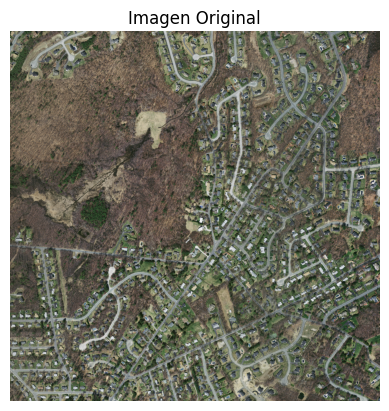

In [ ]:
img_test =  cv2.imread("/content/drive/MyDrive/testing/image/15.png")
y_test =  cv2.imread("/content/drive/MyDrive/testing/mask/15.png")
img_test = cv2.cvtColor(img_test, cv2.COLOR_BGR2RGB)
img_test_resized = cv2.resize(img_test,(224, 224))

plt.imshow(img_test)
plt.title('Imagen Original')
plt.axis('off')

plt.show()


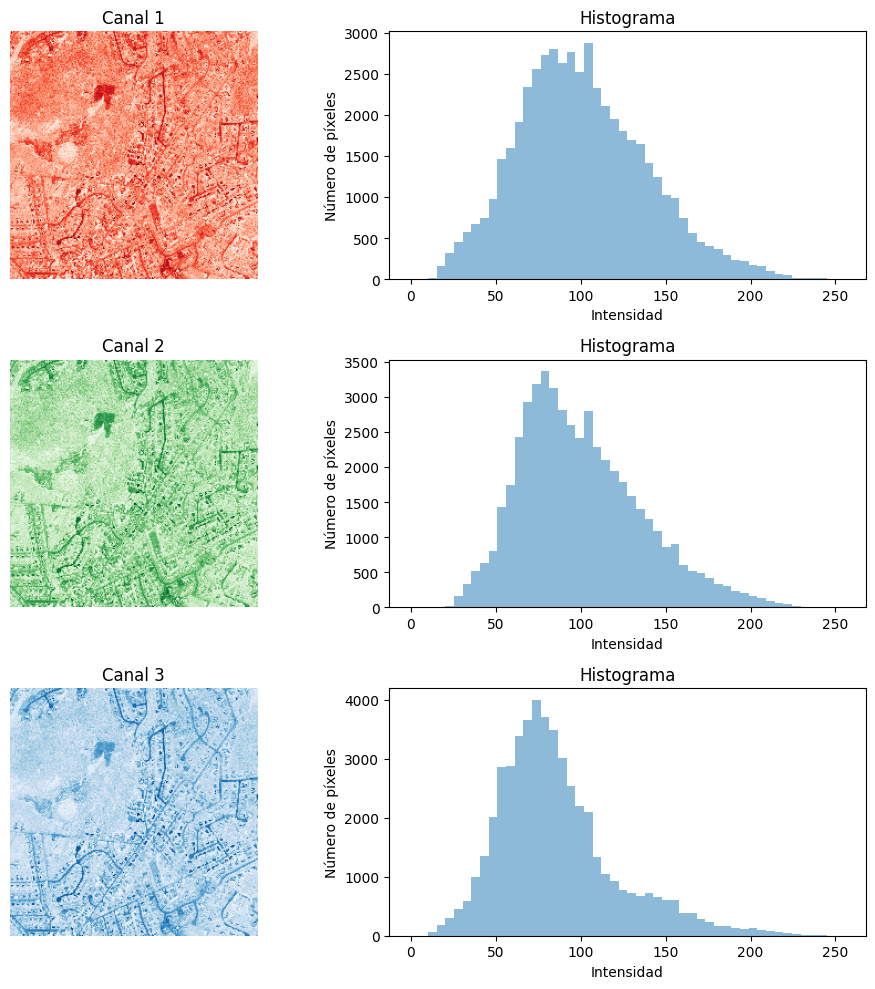

In [ ]:
fig,axs = plt.subplots(3, 2, figsize=(10, 10))
channel = ['Reds', 'Greens', 'Blues']

for i in range(3):
    title = 'Canal ' + str(i+1)
    color = channel[i]
    # Mostrar imagen del canal
    axs[i][0].imshow(img_test_resized[:,:,i],cmap = color)
    axs[i][0].set_title(title)
    axs[i][0].axis('off')

    # Plotear histograma del canal
    axs[i][1].hist(img_test_resized[:,:,i].flatten(), bins=50, range=(0,255), alpha=0.5)
    axs[i][1].set_title('Histograma')
    axs[i][1].set_xlabel('Intensidad')
    axs[i][1].set_ylabel('Número de píxeles')

plt.tight_layout()
plt.show()

In [ ]:

print('---------Analizando Tensor de entrada-----------')
print('Shape:', img_test_resized.shape)
print('dType:', img_test_resized.dtype)
print("")

mins = []
maxs = []
stds = []
means = []

for _ in range(img_test_resized.shape[2]):

  mins.append(np.round(img_test_resized[:, :, _].min(),2))
  maxs.append(np.round(img_test_resized[:, :, _].max(),2))
  stds.append(np.round(img_test_resized[:, :, _].std(),2))
  means.append(np.round(img_test_resized[:, :, _].mean(),2))

props = {
    'Min' : mins,
    'Max' : maxs,
    'Mean': means,
    'Std' : stds
}

df = pd.DataFrame([mins, maxs, means, stds],
                  index=['Min', 'Max', 'Mean', 'Std'],
                  columns=['Canal R', 'Canal G', 'Canal B'])

display(df)

---------Analizando Tensor de entrada-----------
Shape: (224, 224, 3)
dType: uint8



,Canal R,Canal G,Canal B
Min,12.00,20.00,10.00
Max,245.00,245.00,245.00
Mean,100.97,100.38,86.03
Std,37.95,35.98,35.05


Como resumen, el tensor de entrada a la red consiste en una imagen de 224x224 en formato RGB y, del ejemplo visto anteriormente podemos ver que el tensor ya se encuentra normalizado puesto que de los histograma se aprecia que los valores están ubicados en un rango de [0,1].

# 3. Elige entre el positional encoding, mask attention layer y logits de salida. Explica que función cumplen y para el ejemplo anterior muestra los valores y activaciones más relevantes.

In [ ]:
#Realizamos la predicción con la imagen del apartado anterior

def make_patches(image, patch_size=224, overlap=0):
    patches = []

    stride = patch_size - overlap

    for y in range(0, image.shape[0] - patch_size + 1, stride):
        for x in range(0, image.shape[1] - patch_size + 1, stride):
            patch = image[y:y+patch_size, x:x+patch_size,:]
            patches.append(patch)

    return np.array(patches)


def reconstruct_from_patches_rgb(patches, image_shape, patch_size=224, overlap=0):
    stride = patch_size - overlap
    H, W, C = image_shape  # canales
    reconstructed = np.zeros((H, W, C), dtype=np.float32)
    weight_map = np.zeros((H, W, 1), dtype=np.float32)  # compartido entre canales

    idx = 0
    for y in range(0, H - patch_size + 1, stride):
        for x in range(0, W - patch_size + 1, stride):
            reconstructed[y:y+patch_size, x:x+patch_size, :] += patches[idx]
            weight_map[y:y+patch_size, x:x+patch_size, 0] += 1
            idx += 1

    # Promediar zonas solapadas
    reconstructed /= np.maximum(weight_map, 1)

    return reconstructed



In [ ]:
patches = make_patches(img_test,patch_size=224,overlap=14)

predictions = []
for p in patches:
    #p_scaled = p / 255.0        # normalizar según cómo entrenaste
    pred = model.predict(np.expand_dims(p, axis=0))
    predictions.append(pred.squeeze())


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 

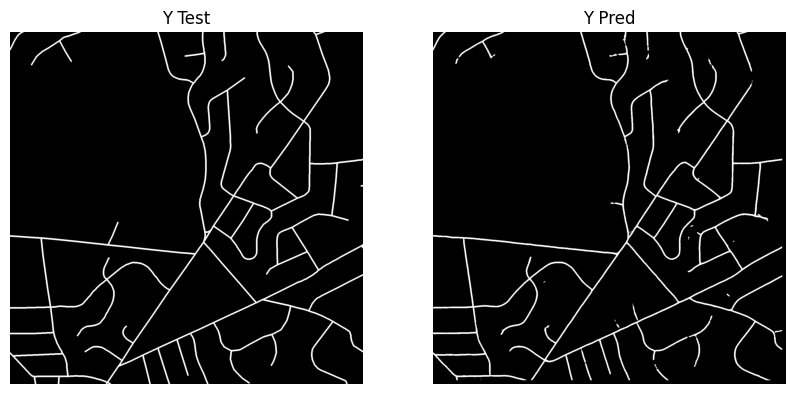

In [ ]:
# 5) recomponer usando utils
mask_full = reconstruct_from_patches(predictions, img_test.shape,patch_size=224,overlap=14)

# 6) umbral para máscara binaria
mask_binary = (mask_full > 0.5).astype(np.uint8)


fig,axes = plt.subplots(1, 2, figsize=(10, 10))
axes[0].set_title('Y Test')
axes[0].imshow(y_test)
axes[0].axis('off')
axes[1].set_title('Y Pred')
axes[1].imshow(mask_binary, cmap='gray')
axes[1].axis('off')
plt.show()

In [ ]:
print('---------Analizando Tensor de salida-----------')
print('Shape:', mask_binary.shape)
print('dType:', mask_binary.dtype)
print('Max:', np.round(mask_binary.max(),3))
print('Min:', np.round(mask_binary.min(),3))


---------Analizando Tensor de salida-----------
Shape: (1500, 1500)
dType: uint8
Max: 1
Min: 0
